<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Pandas_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will learn some visualization packages in Python.

* **matplotlib**:  is a basic and powerful library; good for basic plotting like generating scatter plots, lines and barplots. It can be used on data loaded through pandas directly.
* **seaborn**:  is a library built on top of matplotlib for statistical visualization like summarizing data, understanding distributions, searching for patterns and trends etc.
* **bokeh**:  is an interactive data visualization library which allows users to explore data themselves.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Load and preproces data in pandas

In [3]:
tracts = pd.read_csv("CA_census_tracts.csv")

In [4]:
tracts.columns

Index(['GEOID10', 'total_pop', 'median_age', 'pct_hispanic', 'pct_white',
       'pct_black', 'pct_asian', 'pct_male', 'pct_single_family_home',
       'med_home_value', 'med_rooms_per_home', 'pct_built_before_1940',
       'pct_renting', 'rental_vacancy_rate', 'avg_renter_household_size',
       'med_gross_rent', 'med_household_income', 'mean_commute_time',
       'pct_commute_drive_alone', 'pct_below_poverty',
       'pct_college_grad_student', 'pct_same_residence_year_ago',
       'pct_bachelors_degree', 'pct_english_only', 'pct_foreign_born', 'state',
       'county', 'county_name'],
      dtype='object')

In [5]:
tracts.head(3)

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,6001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
1,6001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
2,6001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda


In [6]:
tracts = tracts.set_index("GEOID10")
tracts.head(3)

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
GEOID10,,,,,,,,,,,,,,,,,,,,,
6001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,4.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
6001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,4.8,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
6001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,5.9,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda


## 2. Subset data and use group functions to generate descriptive statistics

In [36]:
#Pick out some counties of your choice
counties = ["Orange","Los Angeles", "Santa Barbara","San Diego", "Riverside"]
filter1 = tracts["county_name"].isin(counties)
tracts_in_counties = tracts[filter1]
tracts_in_counties.head()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
GEOID10,,,,,,,,,,,,,,,,,,,,,
6037106010,3342.0,38.2,73.6,14.8,3.6,145.0,47.0,77.2,460800.0,6.3,...,76.2,21.3,23.8,87.9,20.4,42.1,28.1,6,37,Los Angeles
6037106020,5937.0,37.9,81.1,15.4,1.0,92.0,51.9,95.8,441100.0,6.2,...,82.5,11.4,36.9,95.1,15.5,29.0,37.5,6,37,Los Angeles
6037134720,4645.0,33.6,46.9,23.2,5.0,991.0,49.9,40.2,450600.0,4.2,...,73.6,13.0,32.6,87.4,25.0,32.6,42.2,6,37,Los Angeles
6037137201,6226.0,33.4,19.2,53.6,4.9,1315.0,50.8,34.9,605300.0,4.4,...,71.3,7.1,29.9,86.0,51.0,54.5,39.2,6,37,Los Angeles
6037137502,4627.0,41.9,13.2,67.2,10.8,174.0,47.1,77.0,668400.0,5.4,...,84.9,5.7,22.9,80.8,54.9,77.9,20.1,6,37,Los Angeles


In [37]:
tracts_in_counties["county_name"].unique()

array(['Los Angeles', 'Orange', 'Riverside', 'San Diego', 'Santa Barbara'],
      dtype=object)

In [38]:
tracts_in_counties.describe()

,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,med_rooms_per_home,...,mean_commute_time,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county
count,4100.000000,4072.000000,4074.000000,4074.000000,4074.000000,4100.000000,4074.000000,4062.000000,3.966000e+03,4048.000000,...,4053.000000,4067.000000,4062.000000,4069.000000,4074.000000,4072.000000,4074.000000,4074.000000,4100.0,4100.000000
mean,4717.853902,37.391454,43.238071,34.505179,6.045533,634.576341,49.585739,55.032053,5.296903e+05,4.956769,...,29.555909,74.591517,15.716199,32.443967,87.198331,31.279199,50.678768,30.087261,6.0,49.745854
std,2130.728376,7.659173,27.585034,26.368758,10.037346,856.693309,4.789705,28.774088,3.053489e+05,1.175186,...,5.531586,10.408971,11.150414,14.302357,8.186497,20.436148,24.175041,13.831813,0.0,15.427384
min,0.000000,16.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000e+04,1.300000,...,7.800000,0.000000,0.000000,0.000000,3.600000,0.000000,0.000000,0.000000,6.0,37.000000
25%,3414.500000,32.200000,18.700000,9.325000,0.900000,123.750000,47.400000,32.700000,3.500750e+05,4.100000,...,26.100000,70.600000,7.300000,23.600000,84.300000,13.775000,30.300000,18.700000,6.0,37.000000
50%,4478.000000,36.200000,38.000000,30.550000,2.700000,359.500000,49.300000,57.000000,4.473500e+05,4.900000,...,29.400000,76.600000,12.900000,30.000000,88.800000,27.300000,51.700000,29.400000,6.0,37.000000
75%,5726.250000,41.900000,66.100000,56.975000,6.600000,781.250000,51.500000,78.900000,6.246000e+05,5.700000,...,32.700000,81.300000,21.900000,37.200000,92.300000,46.200000,71.875000,40.300000,6.0,65.000000
max,40402.000000,76.200000,100.000000,96.300000,86.900000,12465.000000,100.000000,100.000000,2.000001e+06,10.000000,...,65.400000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,75.700000,6.0,83.000000


In [39]:
tracts_in_counties[["total_pop","median_age","med_home_value", "med_household_income"]].describe()

,total_pop,median_age,med_home_value,med_household_income
count,4100.000000,4072.000000,3.966000e+03,4046.000000
mean,4717.853902,37.391454,5.296903e+05,70424.647800
std,2130.728376,7.659173,3.053489e+05,32335.729021
min,0.000000,16.500000,1.040000e+04,5682.000000
25%,3414.500000,32.200000,3.500750e+05,45979.250000
50%,4478.000000,36.200000,4.473500e+05,63999.000000
75%,5726.250000,41.900000,6.246000e+05,88013.500000
max,40402.000000,76.200000,2.000001e+06,250001.000000


In [40]:
tracts_in_counties.groupby("county_name")["med_home_value"].describe()

,count,mean,std,min,25%,50%,75%,max
county_name,,,,,,,,
Los Angeles,2252.0,549352.142540,313821.338953,10400.0,360275.0,450850.0,632500.0,2000001.0
Orange,575.0,634920.707826,294687.586817,47500.0,459350.0,578200.0,719250.0,2000001.0
Riverside,448.0,295578.125000,128263.324514,18200.0,209050.0,279850.0,360825.0,946500.0
San Diego,608.0,515570.896382,272093.320370,17900.0,358125.0,447100.0,599600.0,2000001.0
Santa Barbara,83.0,634278.325301,398790.071806,206600.0,312550.0,588200.0,834900.0,2000001.0


## 3. Data visualization from filtered rows

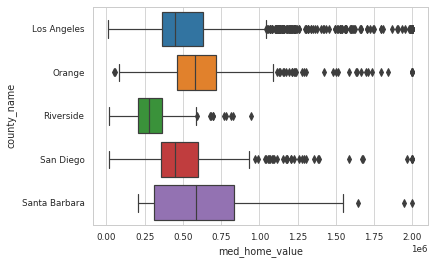

In [41]:
ax = sns.boxplot(x=tracts_in_counties["med_home_value"], y=tracts_in_counties["county_name"])

In [25]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [26]:
fig = ax.get_figure()
type(fig)

matplotlib.figure.Figure

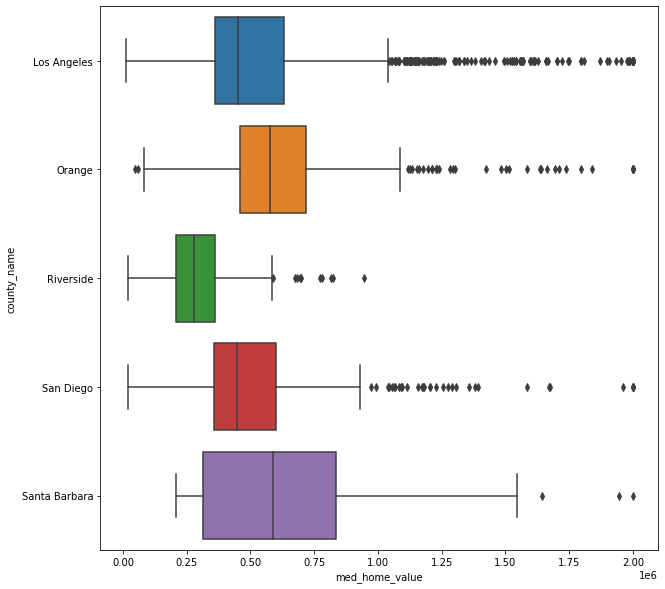

In [28]:
fig = ax.get_figure()
fig.set_size_inches(10, 10)  # inches
fig

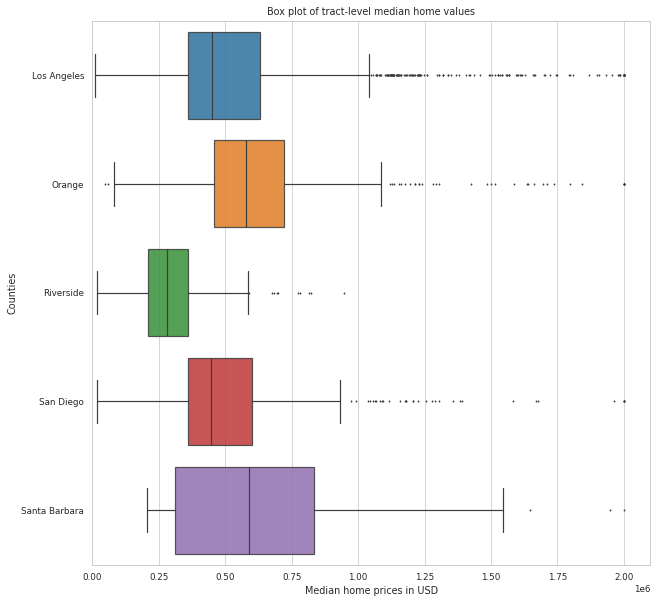

In [34]:
sns.set_style("whitegrid")  # visual styles
sns.set_context("paper")  # presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.boxplot(x=tracts_in_counties["med_home_value"],
                 y=tracts_in_counties["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.87})

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median home values")
ax.set_xlabel("Median home prices in USD")
ax.set_ylabel("Counties")

# save figure to disk with 600 dpi and a tight bounding box
fig = ax.get_figure()
fig.set_size_inches(10,10)
fig.savefig("figure-homevalue-boxplot.png", dpi=600, bbox_inches="tight")

Now modify the code so that you can visualize box plots of median age and median household income for the 5 counties 

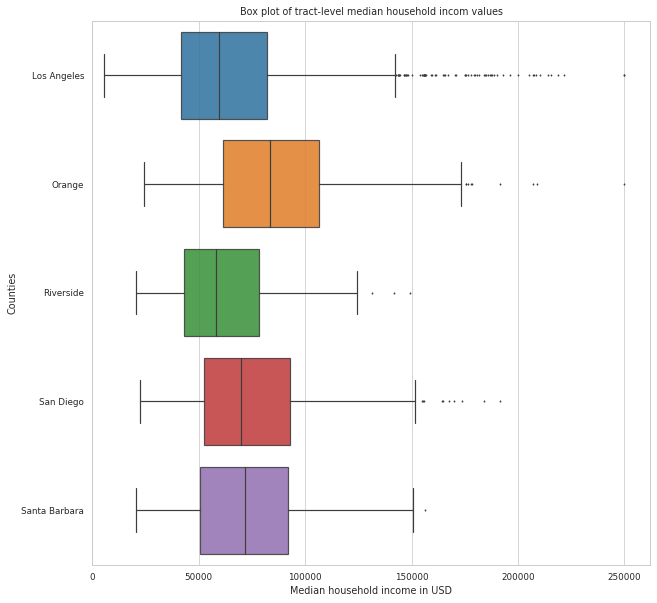

In [42]:
sns.set_style("whitegrid")  # visual styles
sns.set_context("paper")  # presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.boxplot(x=tracts_in_counties["med_household_income"],
                 y=tracts_in_counties["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.87})

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median household incom values")
ax.set_xlabel("Median household income in USD")
ax.set_ylabel("Counties")

# save figure to disk with 600 dpi and a tight bounding box
fig = ax.get_figure()
fig.set_size_inches(10,10)
fig.savefig("figure-income-boxplot.png", dpi=600, bbox_inches="tight")

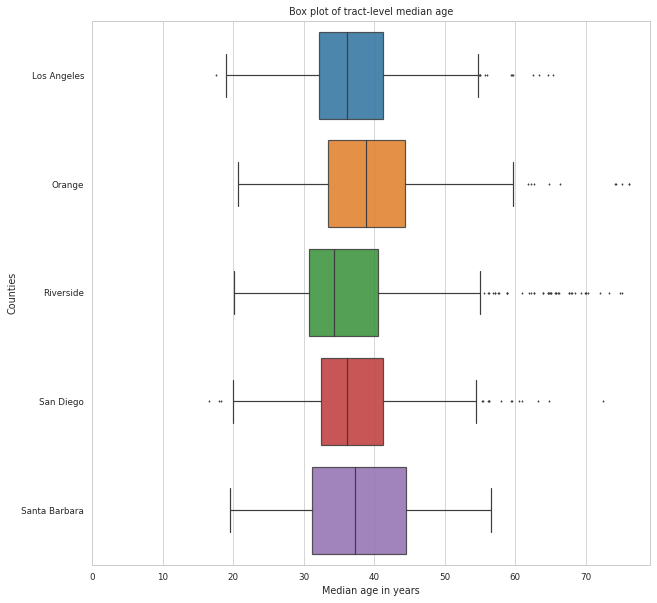

In [43]:
sns.set_style("whitegrid")  # visual styles
sns.set_context("paper")  # presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.boxplot(x=tracts_in_counties["median_age"],
                 y=tracts_in_counties["county_name"],
                 fliersize=1,
                 boxprops={"alpha": 0.87})

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median age")
ax.set_xlabel("Median age in years")
ax.set_ylabel("Counties")

# save figure to disk with 600 dpi and a tight bounding box
fig = ax.get_figure()
fig.set_size_inches(10,10)
fig.savefig("figure-age-boxplot.png", dpi=600, bbox_inches="tight")

Now lets try barplots

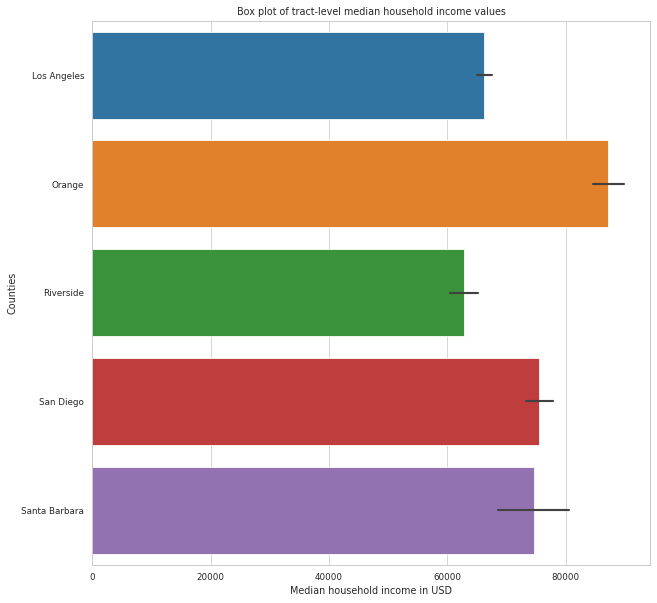

In [46]:
sns.set_style("whitegrid")  # visual styles
sns.set_context("paper")  # presets for scaling figure element sizes

# fliersize changes the size of the outlier dots
# boxprops lets you set more configs with a dict, such as alpha (which means opacity)
ax = sns.barplot(x=tracts_in_counties["med_household_income"],
                 y=tracts_in_counties["county_name"])

# set the x-axis limit, the figure title, and x/y axis labels
ax.set_xlim(left=0)
ax.set_title("Box plot of tract-level median household income values")
ax.set_xlabel("Median household income in USD")
ax.set_ylabel("Counties")

# save figure to disk with 600 dpi and a tight bounding box
fig = ax.get_figure()
fig.set_size_inches(10,10)
fig.savefig("figure-income-barplot.png", dpi=600, bbox_inches="tight")

## Histograms and Density plots

Histograms visualize the distribution of some variable by binning it then counting observations per bin. Density plots are similar, but continuous and smooth as they visulize the probability distributions.

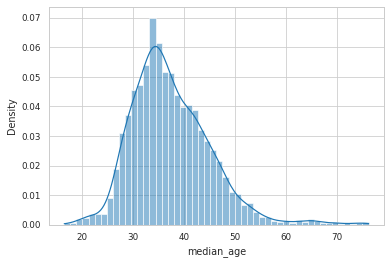

In [47]:
ax = sns.histplot(tracts_in_counties["median_age"].dropna(), stat="density", kde=True)

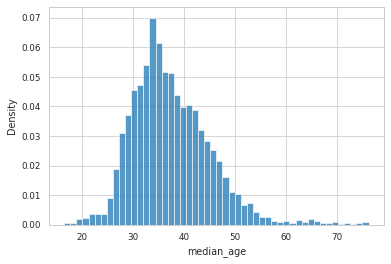

In [48]:
ax = sns.histplot(tracts_in_counties["median_age"].dropna(), stat="density", kde=False)

In [49]:
df_white = tracts[tracts["pct_white"] > 50]
df_hispanic = tracts[tracts["pct_hispanic"] > 50]

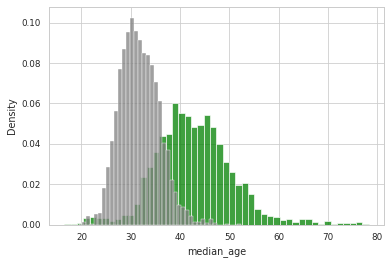

In [51]:
ax = sns.histplot(df_white["median_age"].dropna(), stat="density", color = "green")
ax = sns.histplot(df_hispanic["median_age"].dropna(), stat="density", color="grey")

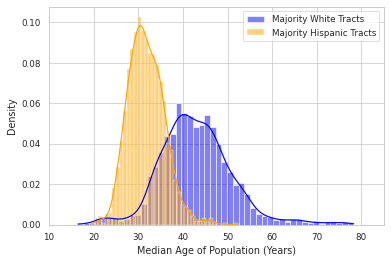

In [53]:
ax = sns.histplot(df_white["median_age"].dropna(),
                  stat="density", kde = True,
                  label="Majority White Tracts",
                  color = "blue")

ax = sns.histplot(df_hispanic["median_age"].dropna(),
                  stat="density",kde = True,
                  label="Majority Hispanic Tracts",
                  color="orange")
ax.legend()

# set x-limit, add x-label, then save to disk
ax.set_xlim(10, 85)
ax.set_xlabel("Median Age of Population (Years)")
ax.get_figure().savefig("figure-age-distributions.png", dpi=600, bbox_inches="tight")

## Scatter Plots

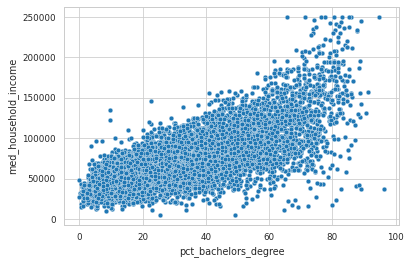

In [55]:
ax = sns.scatterplot(x=tracts["pct_bachelors_degree"], y=tracts["med_household_income"])

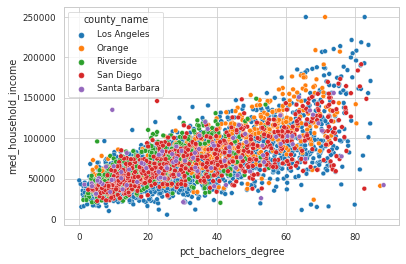

In [56]:
ax = sns.scatterplot(x=tracts_in_counties["pct_bachelors_degree"],
                     y=tracts_in_counties["med_household_income"],
                     hue=tracts_in_counties["county_name"])

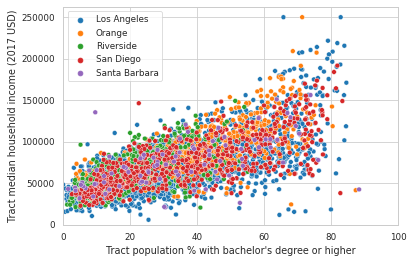

In [57]:
ax = sns.scatterplot(x=tracts_in_counties["pct_bachelors_degree"],
                     y=tracts_in_counties["med_household_income"],
                     hue=tracts_in_counties["county_name"])
# remove the column name from the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# set x/y limits, labels, and save figure
ax.set_xlim(0, 100)
ax.set_ylim(bottom=0)
ax.set_xlabel("Tract population % with bachelor's degree or higher")
ax.set_ylabel("Tract median household income (2017 USD)")
ax.get_figure().savefig("figure-income-degree-scatterplot.png", dpi=600, bbox_inches="tight")

### Now it's your turn: pick 2 new variables from the full dataset and scatter plot them against each other. How do you interpret the pattern? what if you look at only 1 county?